<a href="https://colab.research.google.com/github/jykeous/403-test/blob/main/Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports

import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import linregress
from io import BytesIO

In [ ]:
!wget -O global-vaccination-coverage.csv 'https://www.dropbox.com/scl/fi/fxic30cv0prh6wh1rn0u7/global-vaccination-coverage.csv?rlkey=i37jswwned4tpn67zt3zc6r2u&st=03316obe&dl=0'

--2025-11-03 01:33:51--  https://www.dropbox.com/scl/fi/fxic30cv0prh6wh1rn0u7/global-vaccination-coverage.csv?rlkey=i37jswwned4tpn67zt3zc6r2u&st=03316obe&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc34771c195750a7c1919bcc76f0.dl.dropboxusercontent.com/cd/0/inline/C0YiN6-GYi_IndSozjWjdg3-Ool-6pGiQ1VHDOHNL3CWmphC6HhTs0eXE27zW58YIdw0Of7hxdzyoPSU96aCV1pDHKB1W8rfvGPVATo8BSu0Zb2WAfpUrGN8iNKNOKr2gA2wsyncWRlItrlDY7rRyh3p/file# [following]
--2025-11-03 01:33:51--  https://uc34771c195750a7c1919bcc76f0.dl.dropboxusercontent.com/cd/0/inline/C0YiN6-GYi_IndSozjWjdg3-Ool-6pGiQ1VHDOHNL3CWmphC6HhTs0eXE27zW58YIdw0Of7hxdzyoPSU96aCV1pDHKB1W8rfvGPVATo8BSu0Zb2WAfpUrGN8iNKNOKr2gA2wsyncWRlItrlDY7rRyh3p/file
Resolving uc34771c195750a7c1919bcc76f0.dl.dropboxusercontent.com (uc34771c195750a7c1919bcc76f0.dl.dropboxuser

In [ ]:
df = pd.read_csv('global-vaccination-coverage.csv')
df.head()

,Entity,Code,Year,Share of one-year-olds who have had three doses of the hepatitis B vaccine,Share of one-year-olds vaccinated against Haemophilus influenzae type b,Share of one-year-olds who have had the one dose of the inactivated polio vaccine,Share of one-year-olds who have had one dose of the measles vaccine,Share of one-year-olds who have had the third dose of the pneumococcal conjugate vaccine,Share of one-year-olds who have had three doses of the polio vaccine,Share of one-year-olds vaccinated against rubella,Share of one-year-olds vaccinated against rotavirus,"Share of one-year-olds who have had three doses of the diphtheria, tetanus and pertussis vaccine"
0,Afghanistan,AFG,2007,63.0,NaN,NaN,55.0,NaN,63.0,NaN,NaN,63.0
1,Afghanistan,AFG,2008,64.0,NaN,NaN,59.0,NaN,64.0,NaN,NaN,64.0
2,Afghanistan,AFG,2009,63.0,63.0,NaN,60.0,NaN,63.0,NaN,NaN,63.0
3,Afghanistan,AFG,2010,66.0,66.0,NaN,62.0,NaN,66.0,NaN,NaN,66.0
4,Afghanistan,AFG,2011,68.0,68.0,NaN,64.0,NaN,68.0,NaN,NaN,68.0


In [ ]:
df.describe()

,Year,Share of one-year-olds who have had three doses of the hepatitis B vaccine,Share of one-year-olds vaccinated against Haemophilus influenzae type b,Share of one-year-olds who have had the one dose of the inactivated polio vaccine,Share of one-year-olds who have had one dose of the measles vaccine,Share of one-year-olds who have had the third dose of the pneumococcal conjugate vaccine,Share of one-year-olds who have had three doses of the polio vaccine,Share of one-year-olds vaccinated against rubella,Share of one-year-olds vaccinated against rotavirus,"Share of one-year-olds who have had three doses of the diphtheria, tetanus and pertussis vaccine"
count,9203.000000,5644.000000,4764.000000,2057.000000,9048.000000,2260.000000,9179.000000,5481.000000,1719.000000,9174.000000
mean,2003.044442,78.966668,78.732694,83.578008,78.194158,73.655365,79.707206,78.662314,63.832008,79.304885
std,12.619388,25.339458,26.369896,20.388310,21.700087,26.617100,21.792935,29.152276,30.377425,21.858587
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1993.000000,73.000000,73.000000,77.000000,68.000000,64.000000,71.528670,78.000000,46.000000,71.000000
50%,2003.000000,89.000000,90.000000,92.000000,86.000000,84.000000,88.000000,91.000000,74.000000,88.000000
75%,2014.000000,96.000000,96.000000,98.000000,95.000000,93.000000,95.028120,96.000000,88.000000,95.000000
max,2024.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [ ]:
df['Entity'].unique()

array(['Afghanistan', 'Africa', 'Africa (WHO)', 'Albania', 'Algeria',
       'Americas (WHO)', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic',
       'East Asia and the Pacific (UNICEF)', 'East Timor',
       'Eastern Mediterranean (WHO)',
       'Eastern and Southern Africa (UNICEF)', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9203 entries, 0 to 9202
Data columns (total 12 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Entity                                                                                            9203 non-null   object 
 1   Code                                                                                              8174 non-null   object 
 2   Year                                                                                              9203 non-null   int64  
 3   Share of one-year-olds who have had three doses of the hepatitis B vaccine                        5644 non-null   float64
 4   Share of one-year-olds vaccinated against Haemophilus influenzae type b                           4764 non-null   float64
 5  

In [ ]:
import pandas as pd
import numpy as np

# 1. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\nPercentage of missing values:")
print(df.isnull().sum() / len(df) * 100)

# 2. Remove rows with missing country codes (likely aggregates like "World")
df_clean = df[df['Code'].notna()].copy()

# 3. Shorten column names for easier use
df_clean.columns = [
    'Entity', 'Code', 'Year',
    'HepB', 'Hib', 'IPV', 'Measles',
    'PCV', 'Polio', 'Rubella', 'Rotavirus', 'DTP'
]

# 4. Check the range of years
print(f"\nYear range: {df_clean['Year'].min()} to {df_clean['Year'].max()}")

# 5. Handle missing vaccination data
# Option A: Keep all rows (missing means data not collected)
# Option B: Drop rows where ALL vaccine columns are null
vaccine_cols = ['HepB', 'Hib', 'IPV', 'Measles', 'PCV', 'Polio', 'Rubella', 'Rotavirus', 'DTP']
df_clean = df_clean.dropna(subset=vaccine_cols, how='all')

# 6. Check for duplicate rows
print(f"\nDuplicate rows: {df_clean.duplicated().sum()}")
df_clean = df_clean.drop_duplicates()

# 7. Ensure vaccination percentages are valid (0-100)
for col in vaccine_cols:
    if col in df_clean.columns:
        print(f"\n{col} range: {df_clean[col].min():.2f} to {df_clean[col].max():.2f}")

# 8. View cleaned data
print(f"\nOriginal shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")
print("\nCleaned data preview:")
df_clean.head()

# 9. Save cleaned data if needed
# df_clean.to_csv('vaccination_data_cleaned.csv', index=False)

Missing values per column:
Entity                                                                                                 0
Code                                                                                                1029
Year                                                                                                   0
Share of one-year-olds who have had three doses of the hepatitis B vaccine                          3559
Share of one-year-olds vaccinated against Haemophilus influenzae type b                             4439
Share of one-year-olds who have had the one dose of the inactivated polio vaccine                   7146
Share of one-year-olds who have had one dose of the measles vaccine                                  155
Share of one-year-olds who have had the third dose of the pneumococcal conjugate vaccine            6943
Share of one-year-olds who have had three doses of the polio vaccine                                  24
Share of one-year-olds vacci

,Entity,Code,Year,HepB,Hib,IPV,Measles,PCV,Polio,Rubella,Rotavirus,DTP
0,Afghanistan,AFG,2007,63.0,NaN,NaN,55.0,NaN,63.0,NaN,NaN,63.0
1,Afghanistan,AFG,2008,64.0,NaN,NaN,59.0,NaN,64.0,NaN,NaN,64.0
2,Afghanistan,AFG,2009,63.0,63.0,NaN,60.0,NaN,63.0,NaN,NaN,63.0
3,Afghanistan,AFG,2010,66.0,66.0,NaN,62.0,NaN,66.0,NaN,NaN,66.0
4,Afghanistan,AFG,2011,68.0,68.0,NaN,64.0,NaN,68.0,NaN,NaN,68.0


UNIVARIATE ANALYSIS: OLD VS NEW VACCINES

1. DATA AVAILABILITY BY VACCINE
------------------------------------------------------------
     Vaccine  Records  Coverage %
0      Polio     8150       99.71
1        DTP     8145       99.65
2    Measles     8019       98.10
3       HepB     4767       58.32
4    Rubella     4455       54.50
5        Hib     3996       48.89
6        PCV     1877       22.96
7        IPV     1833       22.42
8  Rotavirus     1297       15.87

OLD VACCINES (Established): ['DTP', 'Polio', 'Measles']
NEW VACCINES (Emerging): ['Rotavirus', 'PCV', 'IPV']


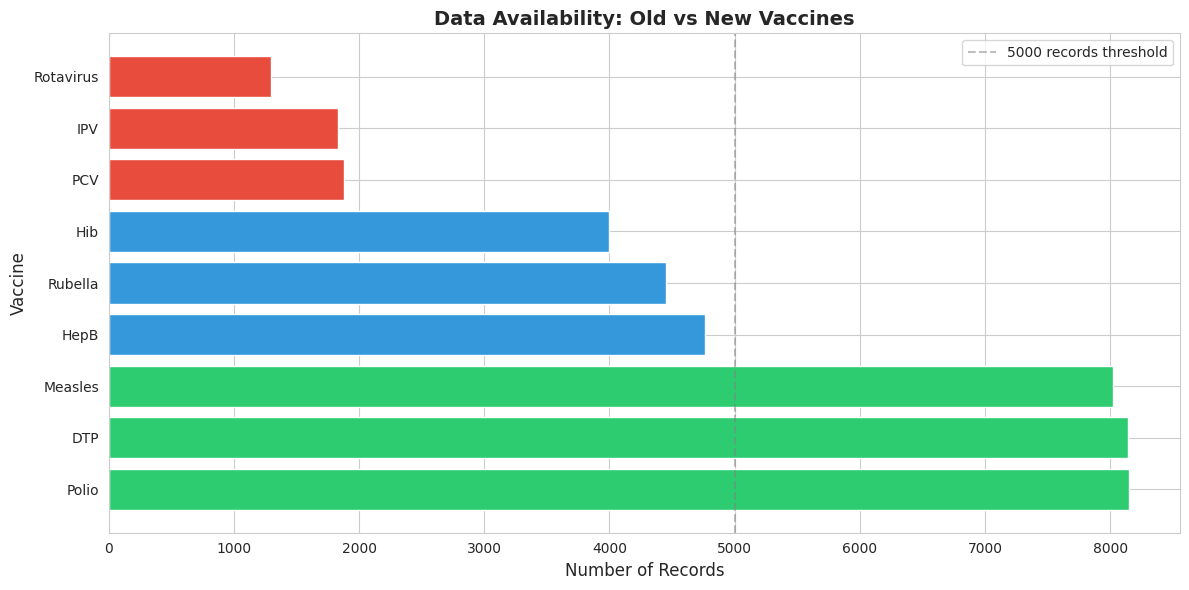


2. DISTRIBUTION STATISTICS
------------------------------------------------------------

HepB:
  Mean:     84.37%
  Median:   91.00%
  Std Dev:  18.41
  Min:      0.00%
  Max:      99.00%
  Q1:       79.00%
  Q3:       96.00%

Hib:
  Mean:     85.85%
  Median:   92.00%
  Std Dev:  16.86
  Min:      0.00%
  Max:      99.00%
  Q1:       82.00%
  Q3:       97.00%

IPV:
  Mean:     84.84%
  Median:   94.00%
  Std Dev:  19.73
  Min:      0.00%
  Max:      99.00%
  Q1:       80.00%
  Q3:       98.00%

Measles:
  Mean:     79.13%
  Median:   87.00%
  Std Dev:  21.39
  Min:      1.00%
  Max:      99.00%
  Q1:       69.00%
  Q3:       95.00%

PCV:
  Mean:     79.84%
  Median:   88.00%
  Std Dev:  21.41
  Min:      0.00%
  Max:      99.00%
  Q1:       73.00%
  Q3:       94.00%

Polio:
  Mean:     80.63%
  Median:   89.00%
  Std Dev:  21.69
  Min:      0.00%
  Max:      99.00%
  Q1:       73.00%
  Q3:       96.00%

Rubella:
  Mean:     88.88%
  Median:   93.00%
  Std Dev:  13.70
  Min:      3.00

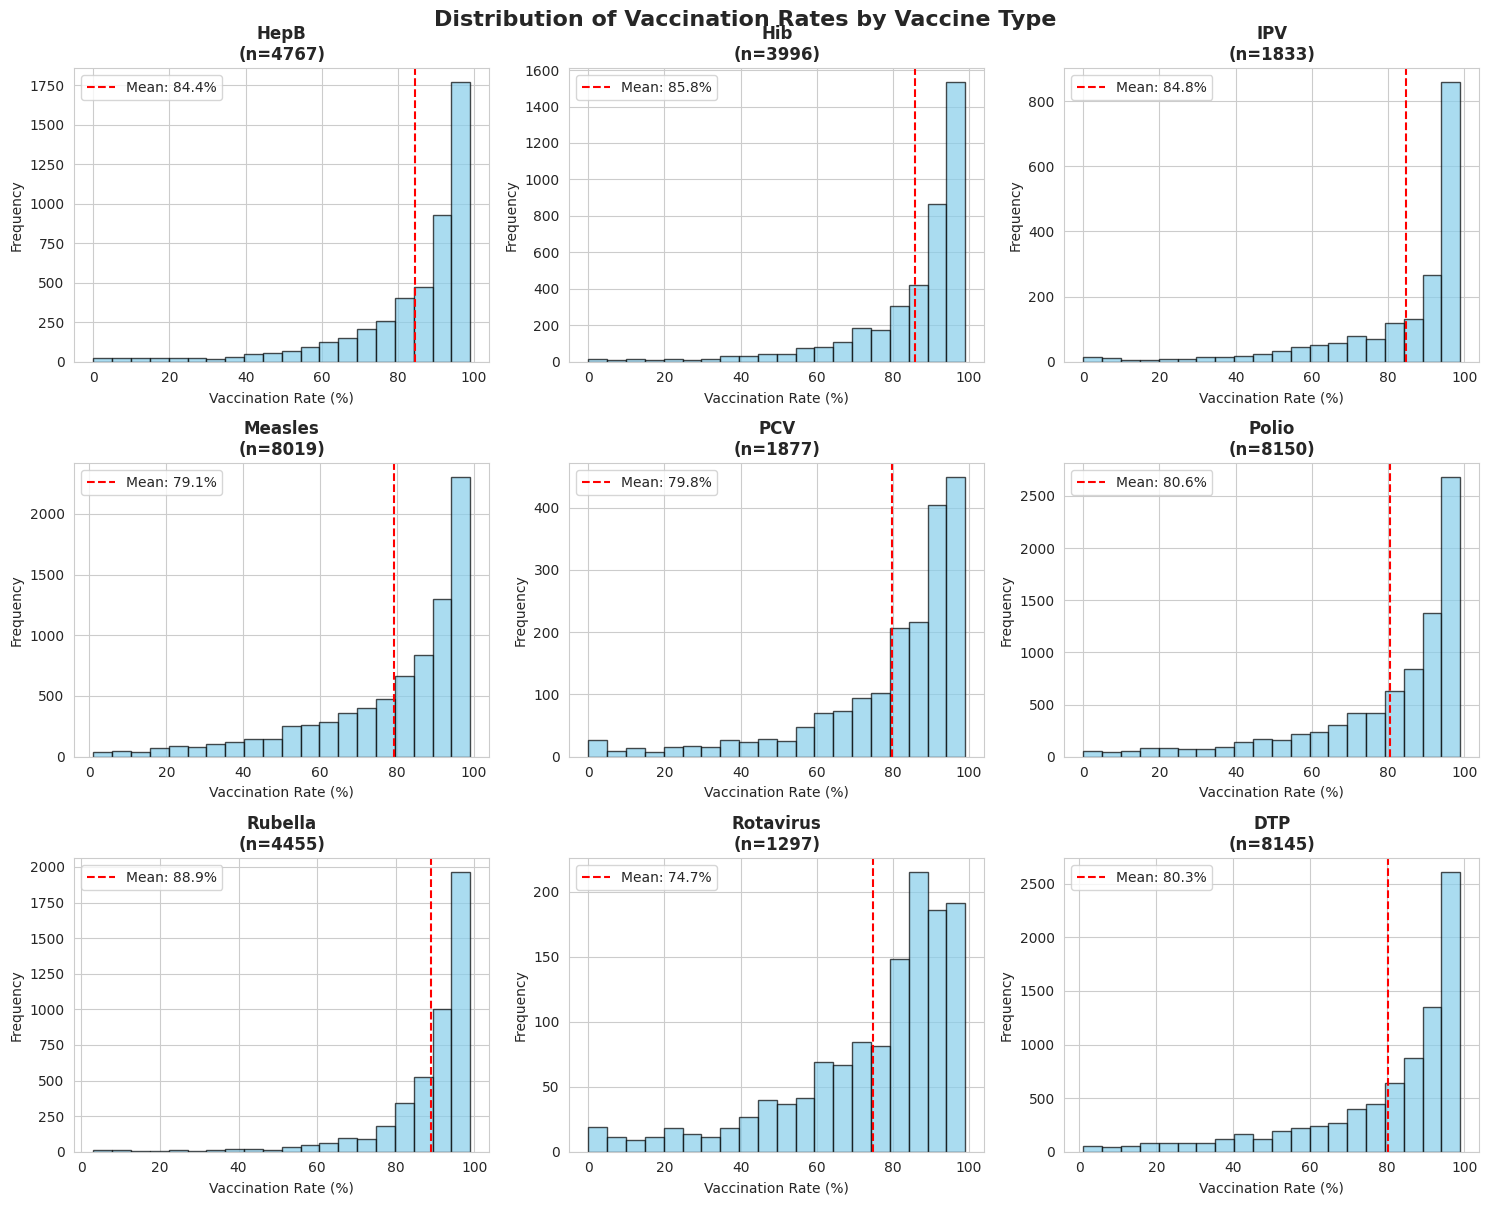


4. COMPARING OLD VS NEW VACCINES
------------------------------------------------------------

OLD VACCINES:
  Mean: 80.02%
  Median: 89.00%
  Std: 21.59

NEW VACCINES:
  Mean: 80.35%
  Median: 88.00%
  Std: 21.45


/tmp/ipython-input-2361759836.py:124: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot([df[v].dropna() for v in old_vaccines], labels=old_vaccines)
/tmp/ipython-input-2361759836.py:131: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([df[v].dropna() for v in new_vaccines], labels=new_vaccines)


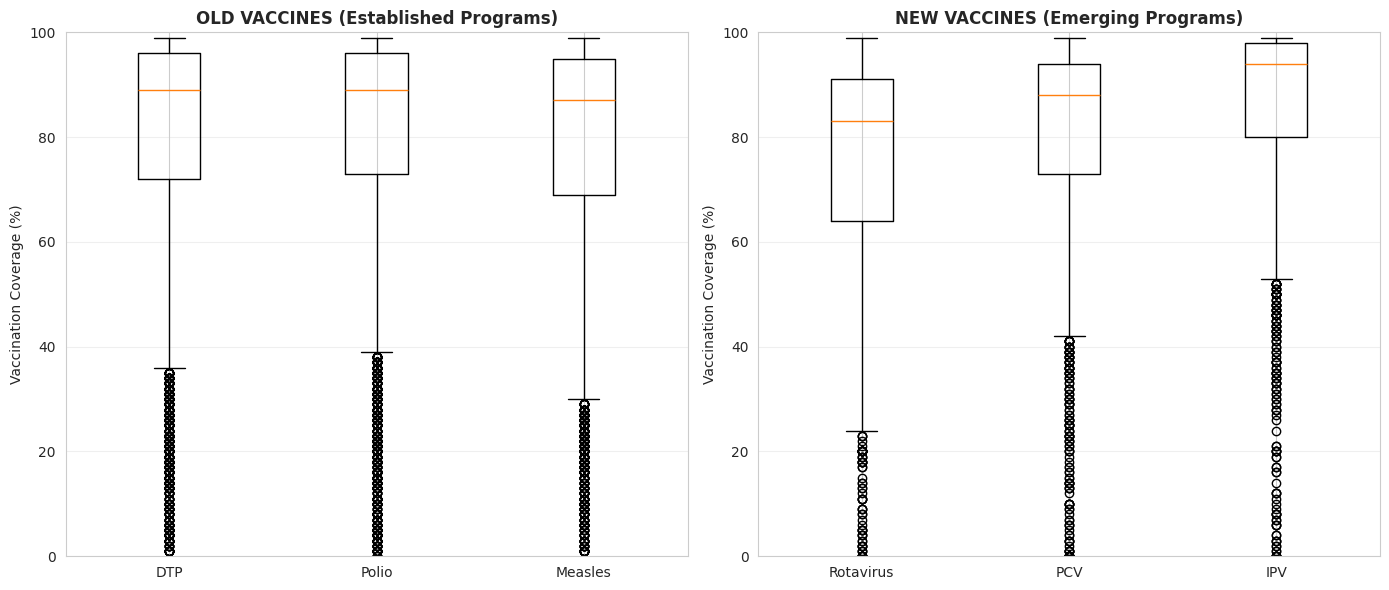


5. TEMPORAL COVERAGE BY VACCINE
------------------------------------------------------------
HepB            | Years: 1985 - 2024 | Span: 40 years
Hib             | Years: 1990 - 2024 | Span: 35 years
IPV             | Years: 2015 - 2024 | Span: 10 years
Measles         | Years: 1980 - 2024 | Span: 45 years
PCV             | Years: 2008 - 2024 | Span: 17 years
Polio           | Years: 1980 - 2024 | Span: 45 years
Rubella         | Years: 1980 - 2024 | Span: 45 years
Rotavirus       | Years: 2006 - 2024 | Span: 19 years
DTP             | Years: 1980 - 2024 | Span: 45 years

6. VACCINATION COVERAGE CATEGORIES
------------------------------------------------------------

DTP:
  Excellent (90%+)    :  3964 ( 48.5%)
  Good (75-89%)       :  1962 ( 24.0%)
  Moderate (50-74%)   :  1330 ( 16.3%)
  Low (<50%)          :   889 ( 10.9%)
  No Data             :    29 (  0.4%)

Polio:
  Excellent (90%+)    :  4061 ( 49.7%)
  Good (75-89%)       :  1886 ( 23.1%)
  Moderate (50-74%)   :  1337 ( 16.4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Use your cleaned data
df = df_clean  # <-- Using your cleaned dataframe

vaccine_cols = ['HepB', 'Hib', 'IPV', 'Measles', 'PCV', 'Polio', 'Rubella', 'Rotavirus', 'DTP']

# ============================================
# PART 1: DATA COMPLETENESS ANALYSIS
# ============================================

print("="*60)
print("UNIVARIATE ANALYSIS: OLD VS NEW VACCINES")
print("="*60)

# 1.1 Count of non-null values (data availability)
print("\n1. DATA AVAILABILITY BY VACCINE")
print("-"*60)
completeness = df[vaccine_cols].count().sort_values(ascending=False)
completeness_pct = (completeness / len(df) * 100).round(2)

availability_df = pd.DataFrame({
    'Vaccine': completeness.index,
    'Records': completeness.values,
    'Coverage %': completeness_pct.values
})
print(availability_df)

# Categorize vaccines
old_vaccines = ['DTP', 'Polio', 'Measles']  # 9000+ records
new_vaccines = ['Rotavirus', 'PCV', 'IPV']  # <3000 records

print(f"\nOLD VACCINES (Established): {old_vaccines}")
print(f"NEW VACCINES (Emerging): {new_vaccines}")

# Visualize data availability
plt.figure(figsize=(12, 6))
colors = ['#2ecc71' if v in old_vaccines else '#e74c3c' if v in new_vaccines else '#3498db'
          for v in completeness.index]
plt.barh(completeness.index, completeness.values, color=colors)
plt.xlabel('Number of Records', fontsize=12)
plt.ylabel('Vaccine', fontsize=12)
plt.title('Data Availability: Old vs New Vaccines', fontsize=14, fontweight='bold')
plt.axvline(x=5000, color='gray', linestyle='--', alpha=0.5, label='5000 records threshold')
plt.legend()
plt.tight_layout()
plt.show()

# ============================================
# PART 2: DISTRIBUTION ANALYSIS
# ============================================

print("\n2. DISTRIBUTION STATISTICS")
print("-"*60)

for vaccine in vaccine_cols:
    print(f"\n{vaccine}:")
    print(f"  Mean:     {df[vaccine].mean():.2f}%")
    print(f"  Median:   {df[vaccine].median():.2f}%")
    print(f"  Std Dev:  {df[vaccine].std():.2f}")
    print(f"  Min:      {df[vaccine].min():.2f}%")
    print(f"  Max:      {df[vaccine].max():.2f}%")
    print(f"  Q1:       {df[vaccine].quantile(0.25):.2f}%")
    print(f"  Q3:       {df[vaccine].quantile(0.75):.2f}%")

# ============================================
# PART 3: HISTOGRAM ANALYSIS
# ============================================

print("\n3. VACCINATION RATE DISTRIBUTIONS")
print("-"*60)

# Create histograms for each vaccine
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, vaccine in enumerate(vaccine_cols):
    axes[idx].hist(df[vaccine].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{vaccine}\n(n={df[vaccine].count()})', fontweight='bold')
    axes[idx].set_xlabel('Vaccination Rate (%)')
    axes[idx].set_ylabel('Frequency')
    axes[idx].axvline(df[vaccine].mean(), color='red', linestyle='--', label=f'Mean: {df[vaccine].mean():.1f}%')
    axes[idx].legend()

plt.tight_layout()
plt.suptitle('Distribution of Vaccination Rates by Vaccine Type', fontsize=16, fontweight='bold', y=1.00)
plt.show()

# ============================================
# PART 4: BOX PLOT COMPARISON
# ============================================

print("\n4. COMPARING OLD VS NEW VACCINES")
print("-"*60)

# Prepare data for comparison
old_data = df[old_vaccines].values.flatten()
old_data = old_data[~np.isnan(old_data)]

new_data = df[new_vaccines].values.flatten()
new_data = new_data[~np.isnan(new_data)]

print(f"\nOLD VACCINES:")
print(f"  Mean: {old_data.mean():.2f}%")
print(f"  Median: {np.median(old_data):.2f}%")
print(f"  Std: {old_data.std():.2f}")

print(f"\nNEW VACCINES:")
print(f"  Mean: {new_data.mean():.2f}%")
print(f"  Median: {np.median(new_data):.2f}%")
print(f"  Std: {new_data.std():.2f}")

# Box plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Old vaccines
ax1.boxplot([df[v].dropna() for v in old_vaccines], labels=old_vaccines)
ax1.set_title('OLD VACCINES (Established Programs)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Vaccination Coverage (%)')
ax1.set_ylim(0, 100)
ax1.grid(axis='y', alpha=0.3)

# New vaccines
ax2.boxplot([df[v].dropna() for v in new_vaccines], labels=new_vaccines)
ax2.set_title('NEW VACCINES (Emerging Programs)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Vaccination Coverage (%)')
ax2.set_ylim(0, 100)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# PART 5: YEAR RANGE ANALYSIS
# ============================================

print("\n5. TEMPORAL COVERAGE BY VACCINE")
print("-"*60)

for vaccine in vaccine_cols:
    vaccine_data = df[df[vaccine].notna()]
    if len(vaccine_data) > 0:
        year_range = f"{vaccine_data['Year'].min()} - {vaccine_data['Year'].max()}"
        n_years = vaccine_data['Year'].max() - vaccine_data['Year'].min() + 1
        print(f"{vaccine:15} | Years: {year_range} | Span: {n_years} years")

# ============================================
# PART 6: COVERAGE CATEGORIES
# ============================================

print("\n6. VACCINATION COVERAGE CATEGORIES")
print("-"*60)

def categorize_coverage(rate):
    if pd.isna(rate):
        return 'No Data'
    elif rate >= 90:
        return 'Excellent (90%+)'
    elif rate >= 75:
        return 'Good (75-89%)'
    elif rate >= 50:
        return 'Moderate (50-74%)'
    else:
        return 'Low (<50%)'

for vaccine in old_vaccines + new_vaccines:
    print(f"\n{vaccine}:")
    categories = df[vaccine].apply(categorize_coverage).value_counts()
    for cat, count in categories.items():
        pct = (count / len(df) * 100)
        print(f"  {cat:20}: {count:5} ({pct:5.1f}%)")

# ============================================
# PART 7: KEY INSIGHTS SUMMARY
# ============================================

print("\n" + "="*60)
print("KEY INSIGHTS")
print("="*60)

print("\n✓ DATA AVAILABILITY:")
print(f"  - Old vaccines have {completeness[old_vaccines].mean():.0f} avg records")
print(f"  - New vaccines have {completeness[new_vaccines].mean():.0f} avg records")
print(f"  - {(completeness[old_vaccines].mean() / completeness[new_vaccines].mean()):.1f}x more data for old vaccines")

print("\n✓ COVERAGE RATES:")
print(f"  - Old vaccines: {old_data.mean():.1f}% average coverage")
print(f"  - New vaccines: {new_data.mean():.1f}% average coverage")
print(f"  - Gap: {old_data.mean() - new_data.mean():.1f} percentage points")

print("\n✓ STORY:")
print("  Established vaccines (DTP, Polio, Measles) show:")
print("  - Near-universal data collection (9000+ records)")
print("  - Higher average coverage rates")
print("  - More consistent implementation globally")
print("\n  Newer vaccines (Rotavirus, PCV) show:")
print("  - Limited data availability (<2300 records)")
print("  - Variable coverage rates")
print("  - Still in rollout phase in many countries")

print("\n" + "="*60)

## Bivariate Analyses

I used AI to insert country development status into the dataset. It is now connected to world bank stats. -Dalan

In [ ]:
!pip install xlrd==2.0.1

In [ ]:
# === 1. Download the World Bank country income classifications XLSX file ===
url = "https://databank.worldbank.org/data/download/site-content/CLASS.xlsx"  # from documentation :contentReference[oaicite:1]{index=1}
response = requests.get(url)
response.raise_for_status()
wb_df = pd.read_excel(BytesIO(response.content), sheet_name="List of economies")

# === 2. Clean and prepare the World Bank dataset ===
wb_df = wb_df.rename(columns={
    "Economy": "Entity",
    "Income group": "Income_Group"
})
wb_df = wb_df[["Entity", "Income_Group"]]

# === 3. Merge income data into your vaccination dataset ===
df = df.merge(wb_df, how="left", on="Entity")

# === 4. Create a 3‑tier classification ===
def map_tier(income):
    if income == "High income":
        return "1st World / Developed"
    elif income in ["Upper middle income", "Lower middle income"]:
        return "2nd World / Developing"
    elif income == "Low income":
        return "3rd World / Least Developed"
    else:
        return "Unknown"

df["Development_Tier"] = df["Income_Group"].apply(map_tier)

# === 5. Optional: verify results ===
print(df[["Entity", "Income_Group", "Development_Tier"]].head(15))
print("\nTier counts:\n", df["Development_Tier"].value_counts(dropna=False))

# === 6. Optional: save your updated dataset ===
df.to_csv("global‑vaccination‑with‑tiers.csv", index=False)
print("\n✅ Updated dataset saved as 'global‑vaccination‑with‑tiers.csv'")



         Entity Income_Group             Development_Tier
0   Afghanistan   Low income  3rd World / Least Developed
1   Afghanistan   Low income  3rd World / Least Developed
2   Afghanistan   Low income  3rd World / Least Developed
3   Afghanistan   Low income  3rd World / Least Developed
4   Afghanistan   Low income  3rd World / Least Developed
5   Afghanistan   Low income  3rd World / Least Developed
6   Afghanistan   Low income  3rd World / Least Developed
7   Afghanistan   Low income  3rd World / Least Developed
8   Afghanistan   Low income  3rd World / Least Developed
9   Afghanistan   Low income  3rd World / Least Developed
10  Afghanistan   Low income  3rd World / Least Developed
11  Afghanistan   Low income  3rd World / Least Developed
12  Afghanistan   Low income  3rd World / Least Developed
13  Afghanistan   Low income  3rd World / Least Developed
14  Afghanistan   Low income  3rd World / Least Developed

Tier counts:
 Development_Tier
2nd World / Developing         3782
1st 

In [ ]:
df.head()

,Entity,Code,Year,HepB,Hib,IPV,Measles,PCV,Polio,Rubella,Rotavirus,DTP,Income_Group,Development_Tier
0,Afghanistan,AFG,2007,63.0,NaN,NaN,55.0,NaN,63.0,NaN,NaN,63.0,Low income,3rd World / Least Developed
1,Afghanistan,AFG,2008,64.0,NaN,NaN,59.0,NaN,64.0,NaN,NaN,64.0,Low income,3rd World / Least Developed
2,Afghanistan,AFG,2009,63.0,63.0,NaN,60.0,NaN,63.0,NaN,NaN,63.0,Low income,3rd World / Least Developed
3,Afghanistan,AFG,2010,66.0,66.0,NaN,62.0,NaN,66.0,NaN,NaN,66.0,Low income,3rd World / Least Developed
4,Afghanistan,AFG,2011,68.0,68.0,NaN,64.0,NaN,68.0,NaN,NaN,68.0,Low income,3rd World / Least Developed


In [ ]:
#   	Is there a statistically significant difference in Country and Polio vaccination reate

df['Entity'].value_counts()

# Og_Screen =df[df['movie_source_display_name'] == 'Original Screenplay']
# Based_RLE =df[df['movie_source_display_name'] == 'Based on Real Life Events']

# T-Test
# t, p = stats.ttest_ind(Og_Screen['movie_financial_summary_domestic_box_office'], Based_RLE['movie_financial_summary_domestic_box_office'])

# print(f"t-value: {t}")
# print(f"p-value: {p}")

# Yes. P-value is less than .05 and T-value is more than 2

,count
Entity,
Afghanistan,45
Albania,45
Argentina,45
Germany,45
Antigua and Barbuda,45
...,...
Sierra Leone,26
Liberia,26
East Timor,23


In [ ]:
df['Entity'].nunique()

195

Summary Statistics:
         Rotavirus          PCV
count  1172.000000  1172.000000
mean     75.929181    80.041809
std      21.636803    20.355654
min       0.000000     0.000000
25%      67.000000    74.000000
50%      84.000000    87.000000
75%      91.000000    94.000000
max      99.000000    99.000000

Pearson correlation between Rotavirus and PCV coverage: 0.588


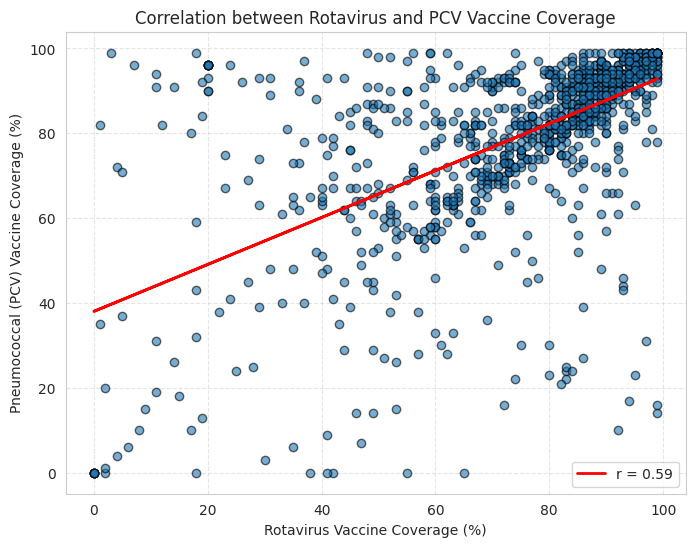


Regression equation: PVC = 38.03 + 0.55 * RVC
R-value: 0.59
R-squared: 0.35
P-value: 0.00
Slope: 0.55


In [ ]:
sub = df[["Rotavirus", "PCV"]].dropna()

# --- 1. Summary statistics ---
print("Summary Statistics:")
print(sub.describe())

# --- 2. Pearson correlation ---
corr_value = sub["Rotavirus"].corr(sub["PCV"])
print(f"\nPearson correlation between Rotavirus and PCV coverage: {corr_value:.3f}")

# --- 3. Visualization (scatter + regression line) ---
plt.figure(figsize=(8,6))
plt.scatter(sub["Rotavirus"], sub["PCV"], alpha=0.6, edgecolor="k")
plt.title("Correlation between Rotavirus and PCV Vaccine Coverage")
plt.xlabel("Rotavirus Vaccine Coverage (%)")
plt.ylabel("Pneumococcal (PCV) Vaccine Coverage (%)")

# Add regression line
m, b = np.polyfit(sub["Rotavirus"], sub["PCV"], 1)
plt.plot(sub["Rotavirus"], m*sub["Rotavirus"] + b, color="red", linewidth=2, label=f"r = {corr_value:.2f}")
plt.legend()

plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

slope, intercept, r_value, p_value, std_err = linregress(x=sub['Rotavirus'], y=sub['PCV'])

print(f"\nRegression equation: PVC = {intercept:.2f} + {slope:.2f} * RVC")
print(f"R-value: {r_value:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"P-value: {p_value:.2f}")
print(f"Slope: {slope:.2f}")

Third world vaccine counts over time

In [ ]:
df['Income_Group'].unique()

array(['Low income', 'Upper middle income', 'Lower middle income',
       'High income', nan], dtype=object)

In [ ]:
# 1.	Is there a statistically significant difference in domestic box office revenue between movies with
#     a source of Original Screenplay and those Based on Real Life Events?

df['Income_Group'].value_counts()

Low_Income =df[df['Income_Group'] == 'Low income']
Low_Middle =df[df['Income_Group'] == 'Lower middle income']
Upper_Middle =df[df['Income_Group'] == 'Upper middle income']
High0income =df[df['Income_Group'] == 'High income']


# T-Test
t, p = stats.ttest_ind(Low_Income['movie_financial_summary_domestic_box_office'], Based_RLE['movie_financial_summary_domestic_box_office'])

print(f"t-value: {t}")
print(f"p-value: {p}")

# Yes. P-value is less than .05 and T-value is more than 2